# Machine learning  and  Deep Learning project- To predict whether or not a person has a heart disease

In [4]:
import pandas as pd # A library helps us in data manipulation(DM) and data analysis and consists of data structures for DM.
import numpy as np # A library designed for high-level mathematical functions and scientific computation.
import matplotlib.pyplot as plt  # Matplotlib is an amazing visualization library in Python for 2D plots of arrays.
import seaborn as sns  #Seaborn is a library for making statistical graphics in Python.
%matplotlib inline       
import warnings #to ignore any warnings we get
warnings.filterwarnings("ignore")
#  Matplotlib inline With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook



In [5]:
Heartdiseaseprediction_data=pd.read_csv("heart.csv")

# Exploratory Data Analysis

In [6]:
# Let's have a glance on the dataset for that we can use head() and tail() functions
Heartdiseaseprediction_data.head() # by default it gives top 5 rows in the dataset we can have more just by entering the number.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
Heartdiseaseprediction_data.tail() # by default it gives last 5 rows in the dataset we can have more just by entering the number

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
Heartdiseaseprediction_data.dtypes  # () is required for functions like head and tail but this is an attribute so not required.
# Every variable except oldpeak seems to be int datatype let's dive in deep to find if it's correct

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [15]:
# I wanna check what is the value counts of each variable
for var in Heartdiseaseprediction_data:
    Heartdiseaseprediction_data[var].value_counts()
    print(Heartdiseaseprediction_data[var].value_counts())


58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64
1    207
0     96
Name: sex, dtype: int64
0    143
2     87
1     50
3     23
Name: cp, dtype: int64
120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1
123     1
200     1
Name: trestbps, 

In [17]:
# So we figured out that 4 variables are categorical but shows int so let's convert the data types
print(Heartdiseaseprediction_data.columns) # fbs, target, exang, sex are categorical

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [21]:
list1=["fbs", "target", "exang", "sex"]
for var in list1:
    Heartdiseaseprediction_data[var]=Heartdiseaseprediction_data[var].astype("category")
print(Heartdiseaseprediction_data.dtypes)


age            int64
sex         category
cp             int64
trestbps       int64
chol           int64
fbs         category
restecg        int64
thalach        int64
exang       category
oldpeak      float64
slope          int64
ca             int64
thal           int64
target      category
dtype: object


In [22]:
# Now that we have set the datatypes correct let's find whether or not we have missing values
Heartdiseaseprediction_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [24]:
# Apparenlty no missing values hence We are going good until now.
# Let's see the statistical summary of the dataset
Heartdiseaseprediction_data.describe()# it's a function that by default ignores the categorical data.
Heartdiseaseprediction_data.describe(include="all")
# NaN means not a number

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.0,303.000000,303.000000,303.000000,303.0,303.000000,303.000000,303.0,303.000000,303.000000,303.000000,303.000000,303.0
unique,NaN,2.0,NaN,NaN,NaN,2.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,2.0
top,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,1.0
freq,NaN,207.0,NaN,NaN,NaN,258.0,NaN,NaN,204.0,NaN,NaN,NaN,NaN,165.0
mean,54.366337,NaN,0.966997,131.623762,246.264026,NaN,0.528053,149.646865,NaN,1.039604,1.399340,0.729373,2.313531,NaN
std,9.082101,NaN,1.032052,17.538143,51.830751,NaN,0.525860,22.905161,NaN,1.161075,0.616226,1.022606,0.612277,NaN
min,29.000000,NaN,0.000000,94.000000,126.000000,NaN,0.000000,71.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,47.500000,NaN,0.000000,120.000000,211.000000,NaN,0.000000,133.500000,NaN,0.000000,1.000000,0.000000,2.000000,NaN
50%,55.000000,NaN,1.000000,130.000000,240.000000,NaN,1.000000,153.000000,NaN,0.800000,1.000000,0.000000,2.000000,NaN
75%,61.000000,NaN,2.000000,140.000000,274.500000,NaN,1.000000,166.000000,NaN,1.600000,2.000000,1.000000,3.000000,NaN


In [25]:
Heartdiseaseprediction_data.notnull().sum()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [26]:
Heartdiseaseprediction_data.info()  # It displays numbe of data points along with datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null category
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null category
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null category
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null category
dtypes: category(4), float64(1), int64(9)
memory usage: 25.4 KB


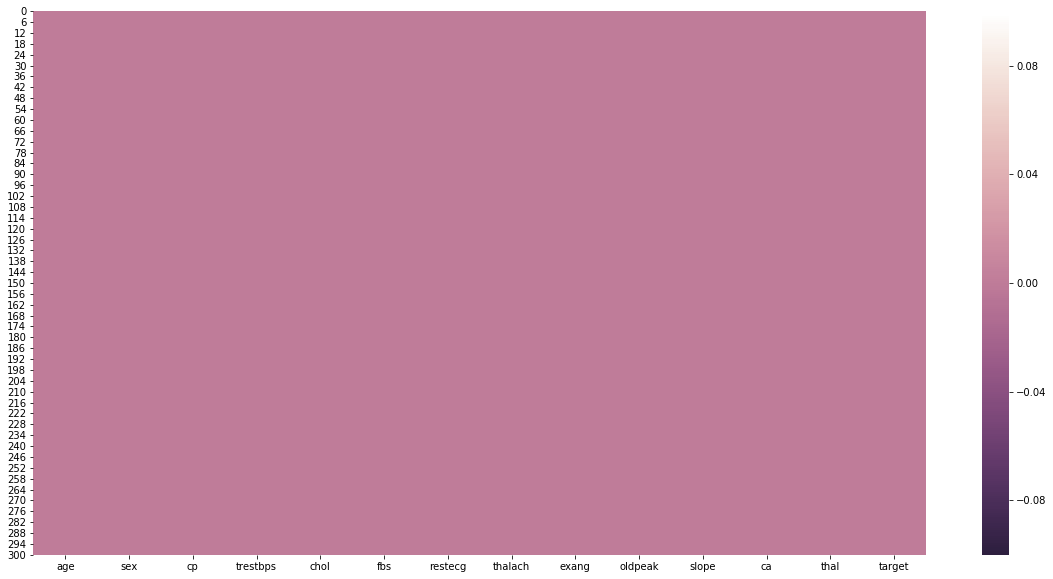

In [30]:
# There you go we came to the interesting part of analysis: can you guess?
# VISUALIZATION: let's visualize the values based on rows
plt.figure(figsize=(20,10))
cmap=sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(Heartdiseaseprediction_data.isnull(), cmap=cmap)

# Feature selection

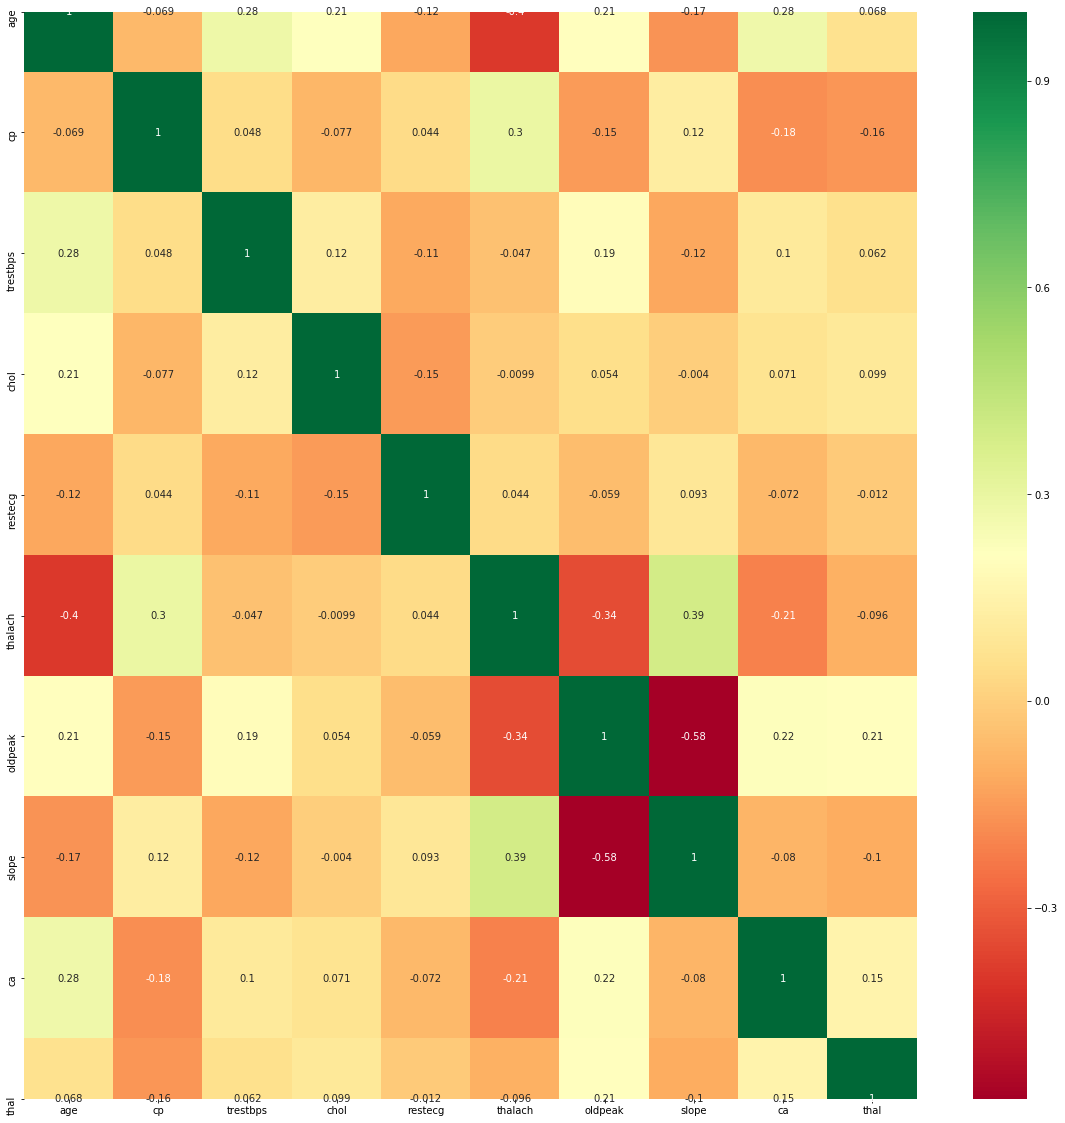

In [35]:
#get correlations of each features in dataset
corrmat = Heartdiseaseprediction_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(Heartdiseaseprediction_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000016ED12C8>,
      dtype=object)

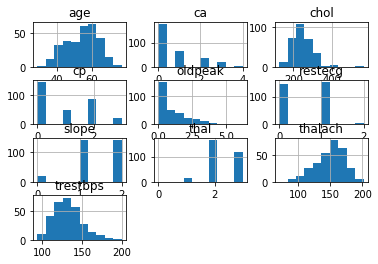

In [37]:
Heartdiseaseprediction_data.hist()

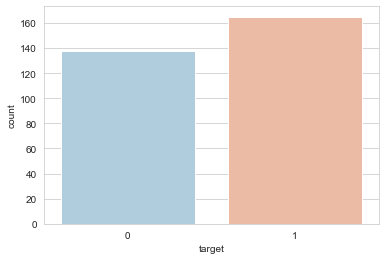

In [39]:
#Let's check the balance of the target variable
sns.set_style('whitegrid')
sns.countplot(x='target',data=Heartdiseaseprediction_data,palette='RdBu_r')

# Data Processing¶
After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the get_dummies method to create dummy columns for categorical variables.

In [40]:
# Although we found only 4 variables with 2 classes as categorical we do have few more but with more than 2 classes.
Heartdiseaseprediction_data=pd.get_dummies(Heartdiseaseprediction_data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [41]:
Heartdiseaseprediction_data.head(5) # data set after creating dummy variables

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,163,0.6,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


# We need to scale the data for the algorithms that are based on distance like knn, k-means
# SCALING

In [48]:
# Let's import the libraries to split the dataset and to perform scaling.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
Coulms_to_scale=['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
Heartdiseaseprediction_data[Coulms_to_scale]=scaling.fit_transform(Heartdiseaseprediction_data[Coulms_to_scale])
 # standadization converts the data set in z scores i.e =x-mean/standard deviation                               


In [49]:
Heartdiseaseprediction_data.head(3)

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0


In [52]:
# Decouple the dataset
y=Heartdiseaseprediction_data["target"]
x=Heartdiseaseprediction_data.drop("target", axis=1)

In [54]:
y.head(3)

0    1
1    1
2    1
Name: target, dtype: category
Categories (2, int64): [0, 1]

#  Model K NEAREST NEIGHBOR

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn_scores=[]
for k in range(1,21):   # we are checking for 20 nearest neighbors
    knn_classifier=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn_classifier, x,y,cv=10)   # cv=10 used for cross validation
    knn_scores.append(scores.mean())

([<matplotlib.axis.XTick at 0x19c7b388>,
 <a list of 20 Text xticklabel objects>)

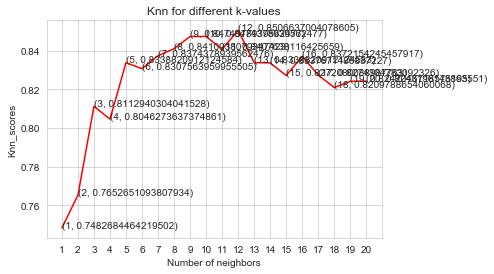

In [61]:
# Let's plot
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
plt.xlabel("Number of neighbors")
plt.ylabel("Knn_scores")
plt.title("Knn for different k-values")
# I want to see the scores at each k value
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])



In [62]:
# K at has good scores
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,x,y,cv=10)

In [63]:
print(score.mean())

0.8506637004078605


# RANDOM FOREST CLASSIFIER

In [68]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier(n_estimators=10)
score=cross_val_score(RFC, x,y, cv=10)
print(score.mean())

0.8082981090100111


In [73]:
print(Heartdiseaseprediction_data.shape)

(303, 31)


# ARTIFICIAL NEURAL NETWORK

In [69]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

Using TensorFlow backend.


In [76]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 30))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer= 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier.fit(x, y, batch_size = 10, nb_epoch = 50)


Epoch 1/50
303/303 [==============================] - 1s 3ms/step - loss: 0.6693 - accuracy: 0.6238
Epoch 2/50
303/303 [==============================] - 0s 660us/step - loss: 0.6530 - accuracy: 0.6832
Epoch 3/50
303/303 [==============================] - 0s 703us/step - loss: 0.6394 - accuracy: 0.6997
Epoch 4/50
303/303 [==============================] - 0s 515us/step - loss: 0.6262 - accuracy: 0.7525
Epoch 5/50
303/303 [==============================] - 0s 485us/step - loss: 0.6138 - accuracy: 0.7723
Epoch 6/50
303/303 [==============================] - 0s 409us/step - loss: 0.6008 - accuracy: 0.7756
Epoch 7/50
303/303 [==============================] - 0s 413us/step - loss: 0.5869 - accuracy: 0.7789
Epoch 8/50
303/303 [==============================] - 0s 429us/step - loss: 0.5724 - accuracy: 0.7954
Epoch 9/50
303/303 [==============================] - 0s 446us/step - loss: 0.5583 - accuracy: 0.8053
Epoch 10/50
303/303 [==============================] - 0s 452us/step - loss: 0.5445 

In [77]:
print(model_history.history.keys())

dict_keys(['loss', 'accuracy'])


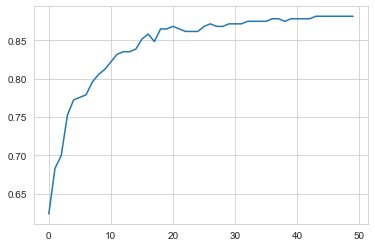

In [78]:
plt.plot(model_history.history['accuracy'])

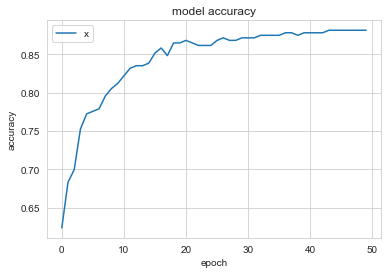

In [79]:
plt.plot(model_history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['x', 'y'], loc='upper left')
plt.show()